In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(color_codes=True)
%matplotlib inline
#Importing all required Packages 

In [2]:
data = pd.read_csv("911.csv")  #Loading the dataset to data variable 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [4]:
data = data.drop(['e'],axis=1) # Dropping e column from dataset data 
data.head() # First five records of the dataset

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:10,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 14:39,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [5]:
data.shape # Number of rows with number of columns with null values

(289240, 8)

In [6]:
df = data.dropna() # Removal of null values from dataset
df.shape

(253897, 8)

In [7]:
df = df.drop_duplicates() # Removal of duplicate data from dataset
df.shape

(253843, 8)

In [8]:
df['zip'].value_counts().head() #Top five zip codes from which most number of emergency calls were made

19401.0    19805
19464.0    19274
19403.0    14519
19446.0    13937
19406.0     9596
Name: zip, dtype: int64

In [9]:
df['twp'].value_counts().head() #Top five Towns from which most number of emergency calls were made 

LOWER MERION    21089
ABINGTON        17012
NORRISTOWN      15753
POTTSTOWN       11790
CHELTENHAM      11566
Name: twp, dtype: int64

In [10]:
df['title'].nunique() # Number of Unique purpose of emergency calls 

129

In [11]:
Reason = df['title'].apply(lambda title : title.split(':')[0]) # Splitting the value from title column based on colon 
Reason.value_counts() # Top emergency calls from 3 Reasons 

EMS        131384
Traffic     84747
Fire        37712
Name: title, dtype: int64

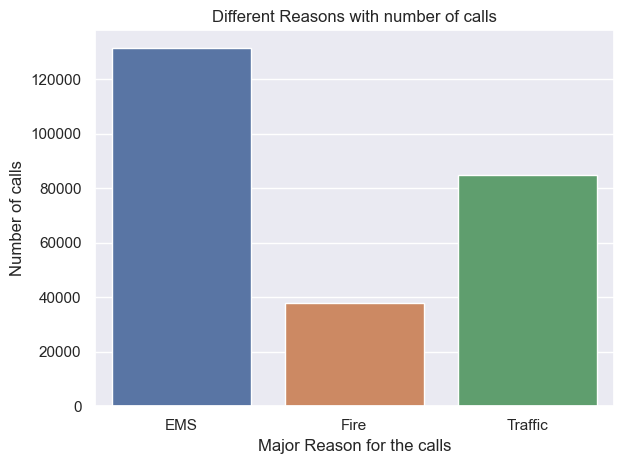

In [85]:
sns.countplot(x=Reason,data=df)
plt.xlabel("Major Reason for the calls") 
plt.ylabel("Number of calls")
plt.title("Different Reasons with number of calls")
plt.tight_layout()

In [14]:
temp = df['timeStamp'].apply(lambda timeStamp:timeStamp.split(' ')[1]) # Splitting the value timestamp with a single white space
Hour = temp.apply(lambda temp:temp.split(':')[0]) # Splitting the value time with a single colon 
Hour

0         17
1         17
2         14
3         16
5         15
          ..
289231    11
289234    11
289237    11
289238    11
289239    11
Name: timeStamp, Length: 253843, dtype: object

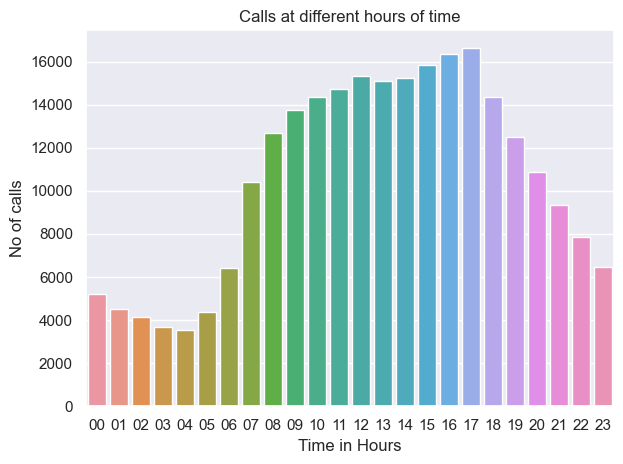

In [84]:
hour = np.sort(Hour)   
sns.countplot(x=hour)      
plt.xlabel("Time in Hours")
plt.ylabel("No of calls")
plt.title("Calls at different hours of time")
plt.tight_layout()

In [16]:
time = df['timeStamp']
year = df['timeStamp'].apply(lambda time:time.split('-')[2])
updateYear = year.apply(lambda year:year.split(' ')[0])
updateYear

0         2015
1         2015
2         2015
3         2015
5         2015
          ... 
289231    2017
289234    2017
289237    2017
289238    2017
289239    2017
Name: timeStamp, Length: 253843, dtype: object

In [20]:
date_time= pd.to_datetime(df['timeStamp']) #Converting from string to Date Time format 
type(date_time[0])        

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
Month = date_time.apply(lambda x:x.month) # Retrieving month data from date_time object 
Month

0         10
1         10
2         10
3         10
5         10
          ..
289231    12
289234    12
289237    12
289238    12
289239    12
Name: timeStamp, Length: 253843, dtype: int64

In [25]:
dayOfWeek = date_time.apply(lambda x:x.dayofweek)  # Retrieving day of the week  data from date_time object
dmap = {0:'Mon',1:'Tues',2:'Wed',3:'Thur',4:'Frid',5:'Sat',6:'Sun'} # Dictionary of names of the day with integer key values
day= dayOfWeek.map(dmap)  # Map function 
day

0         Mon
1         Mon
2         Mon
3         Mon
5         Mon
         ... 
289231    Sat
289234    Sat
289237    Sat
289238    Sat
289239    Sat
Name: timeStamp, Length: 253843, dtype: object

Text(0.5, 1.0, 'Calls made at different days of the week')

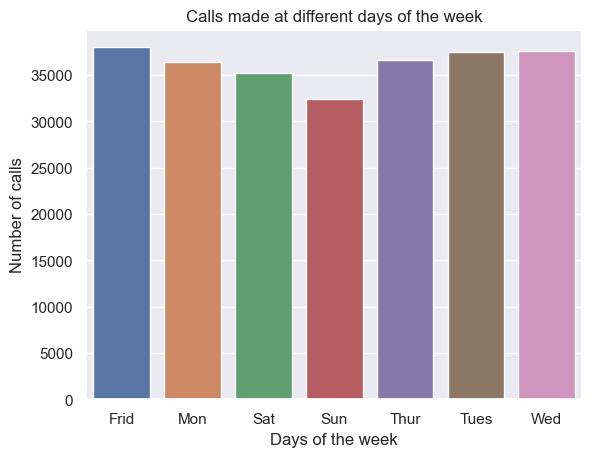

In [83]:
plt.tight_layout()
sns.countplot(x=day,data = df)
plt.xlabel("Days of the week")
plt.ylabel("Number of calls")
plt.title("Calls made at different days of the week")

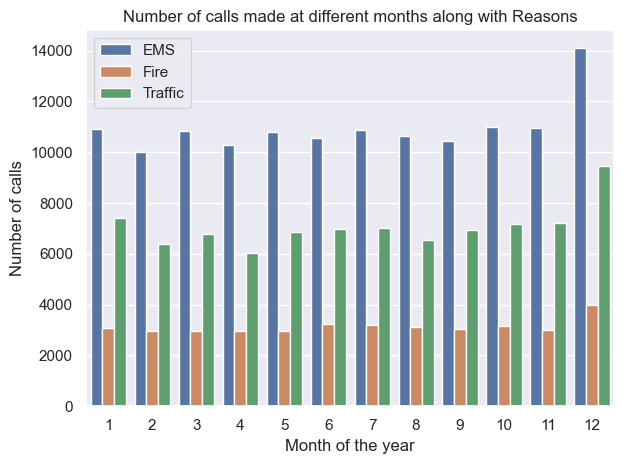

In [82]:
sns.countplot(x=Month,hue=Reason)
plt.legend(loc="upper left")
plt.xlabel("Month of the year")
plt.ylabel("Number of calls")
plt.title("Number of calls made at different months along with Reasons")
plt.tight_layout()

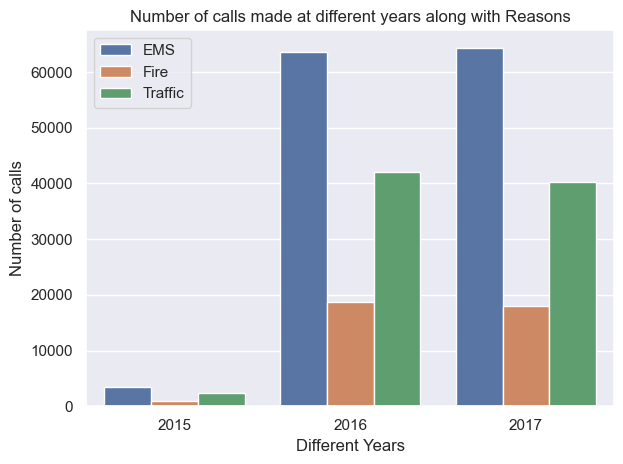

In [81]:
sns.countplot(x=updateYear,hue=Reason)
plt.legend(loc="upper left")
plt.xlabel("Different Years")
plt.ylabel("Number of calls")
plt.title("Number of calls made at different years along with Reasons")
plt.tight_layout()

In [69]:
df['Month'] = date_time.apply(lambda x:x.month)
bymonth = df.groupby('Month').count()

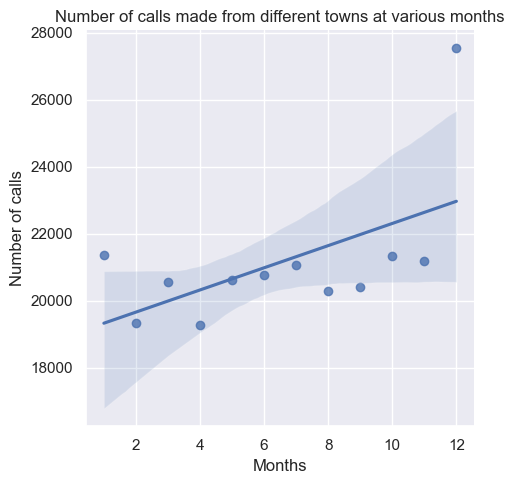

In [80]:
sns.lmplot(x='Month',y='twp',data = bymonth.reset_index())
plt.xlabel("Months")
plt.ylabel("Number of calls")
plt.title("Number of calls made from different towns at various months")
plt.tight_layout()

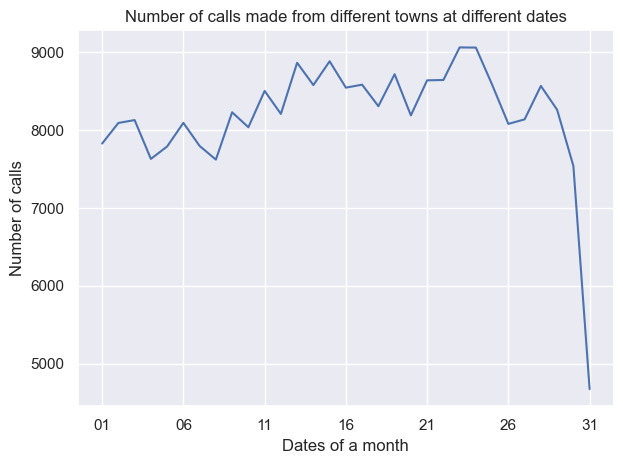

In [86]:
Date = df['timeStamp'].apply(lambda timeStamp:timeStamp.split('-')[0])
df.groupby(Date).count()['twp'].plot()
plt.xlabel("Dates of a month")
plt.ylabel("Number of calls")
plt.title("Number of calls made from different towns at different dates")
plt.tight_layout()